# Finance Problem
To compute the expected value of the discounted returns of the Asian option and the Lookback option under a risk-neutral density Q, we can use the Euler-Maruyama scheme to simulate the underlying stock price.

The Euler-Maruyama scheme is a numerical method for approximating stochastic differential equations. It is particularly suitable for modelling the dynamics of the underlying asset in option pricing.

The following are the steps to calculate the expected value using the Euler-Maruyama scheme (Sauer, 2013):

1. Define the parameters:
- S: initial stock price
- r: risk-free interest rate
- T: time to expiration
- t: current time
- N: number of time steps
- dt: time increment (T/N)
- sigma: stock price volatility
2. Generate N random numbers from the standard normal distribution. These random numbers will be used to simulate the stochastic process.
3. Initialise an array to store the simulated stock prices. Set the first element of the array to the initial stock price.
4. Perform N iterations using Euler-Maruyama scheme:
- Compute the drift term: drift = r * S * dt
- Calculate the diffusion term: diffusion = sigma * S * sqrt(dt) * random number
- Update the stock price: S = S + drift + diffusion
- Store the updated stock price in an array
5. Calculate the payoff for each simulated stock price, depending on the option type (sub-style or lookback).
6. Calculate the discounted return for each simulated stock price: discounted_payoff = exp(-r * (T - t)) * payoff
7. Calculate the expected value of the discounted return: expected_payoff = sum(discounted_payoff) / N

## What is the Asian Call Option and Asian Put Option?
An Asian Call Option is a derivative financial instrument that gives the option holder the right to purchase an underlying asset at a specific price at a specific time in the future. Unlike European-style options, the strike price of Asian Option is based on the average or index price of the underlying asset over a period of time. The holder of an Asian Call Option has the option to purchase the underlying asset at the agreed strike price at expiry and make a profit if the price of the underlying asset is higher than the strike price.

An Asian Put Option is the opposite of an Asian Call Option in that it gives the option holder the right to sell the underlying asset at a specific price at a specific time in the future. The holder has the option to sell the underlying asset at the agreed strike price at expiry and make a profit if the price of the underlying asset is lower than the strike price.

Asian Option has a more complex feature compared to European Option as its strike price is based on the average or index price over a period of time rather than a fixed single price. This makes Asian Option more sensitive to fluctuations in the price of the underlying asset, and therefore the price of Asian Option may be higher in a more volatile market environment.

## What is the Lookback Call Option and Lookback Put Option?
A Lookback Call Option is a derivative financial instrument that gives the option holder the right to purchase the underlying asset at a specific price at a specific time in the future. Unlike European-style options, the strike price of a Lookback Option is based on the highest price of the underlying asset over a period of time. The holder has the option to purchase the underlying asset at the agreed strike price at expiry and make a profit if the maximum price of the underlying asset is higher than the strike price.

A Lookback Put Option is the opposite of a Lookback Call Option in that it gives the option holder the right to sell the underlying asset at a specific price at a specific time in the future. The holder has the option to sell the underlying asset at the agreed strike price at expiry and make a profit if the maximum price of the underlying asset is lower than the strike price.

The characteristic of a Lookback Option is that it allows the option holder to trade at expiry at the highest price of the underlying asset over a period of time, rather than just at a fixed strike price. This allows the Lookback Option to better capture fluctuations and trends in the price of the underlying asset. Lookback Option can provide higher returns if the price of the underlying asset rises or falls significantly during the life of the option.

# Modelling stock price paths using the Euler-Maruyama scheme

In [147]:
import numpy as np

In [148]:
def simulate_path(s0, r, sigma, horizon, timesteps, n_sims):
    # set the random seed for reproducibility
    np.random.seed(2023)

    # read parameters
    S0 = s0  # initial spot price
    T = horizon  # time horizon
    t = timesteps  # number of time steps
    n = n_sims  # number of simulations

    # define dt
    dt = T / t  # length of time interval

    # simulate 'n' asset price paths with 't' time steps
    S = np.zeros((t, n))
    S[0] = S0

    for i in range(0, t - 1):
        w = np.random.standard_normal(n)
        S[i + 1] = S[i] * (1 + r * dt + sigma * np.sqrt(dt) * w)
        # where S[i] is the stock price at the current time step, r is the stock's return (in a risk-neutral framework, r is equal to the risk-free rate), dt is the time interval, sigma is the stock's volatility, and w is a standard normally distributed random number.
        # This function generates multiple stock price paths by iterating through a loop and stores the results in an array S of size (t, n), where t is the number of time steps and n is the number of simulations.

    return S

# Calculating the price of the Asian option
The meaning of each parameter is as follows:
- S: stock price path, a two-dimensional array representing stock prices at different points in time. Each row represents a point in time and each column represents a simulation path.
- K: the strike price of the option.
- r: the risk-free rate, which represents the continuously compounded rate of return under a risk-neutral measure.
- T: the expiration time of the option, which represents the length of time from the current time to the expiration of the option.

In Asian option pricing, the option payoff is obtained by calculating the average price of the stock price path and then comparing it to the strike price. Finally, the payoff of the option is discounted by a discount factor for the option's time to expiration to obtain the price of the option.

In [149]:
def asian_call_option_price(S, E, r, T):
    # calculate the average price of each path
    average_price = np.mean(S, axis=0)

    # calculate the payoff of the Asian call option
    payoff = np.maximum(average_price - E, 0)

    # calculate the discounted expected payoff
    discounted_payoff = np.exp(-r * T) * payoff

    # calculate the option price
    option_price = np.mean(discounted_payoff)

    return option_price

In [150]:
def asian_put_option_price(S, E, r, T):
    # calculate the average price of each path
    average_price = np.mean(S, axis=0)

    # calculate the payoff of the Asian put option
    payoff = np.maximum(E - average_price, 0)

    # calculate the discounted expected payoff
    discounted_payoff = np.exp(-r * T) * payoff

    # calculate the option price
    option_price = np.mean(discounted_payoff)

    return option_price

# Calculating the price of the Lookback option
The meaning of each parameter is as follows:
- S: stock price path, a two-dimensional array representing stock prices at different points in time. Each row represents a point in time and each column represents a simulation path.
- r: the risk-free rate, which represents the continuously compounded rate of return under a risk-neutral measure.
- T: the expiration time of the option, denoting the length of time from the current time to the expiration of the option.

In lookback option pricing, the option payoff is obtained by calculating the maximum price of the stock price path and then comparing it to the initial price. Finally, the payoff of the option is discounted by a discount factor for the option's time to expiration to obtain the price of the option.

In [151]:
def lookback_call_option_price(S, r, T):
    # calculate the maximum price of each path
    max_price = np.max(S, axis=0)

    # calculate the payoff of the lookback call option
    payoff = max_price - S[0]

    # calculate the discounted expected payoff
    discounted_payoff = np.exp(-r * T) * payoff

    # calculate the option price
    option_price = np.mean(discounted_payoff)

    return option_price

In [152]:
def lookback_put_option_price(S, r, T):
    # calculate the minimum price of each path
    min_price = np.min(S, axis=0)

    # calculate the payoff of the lookback put option
    payoff = S[0] - min_price

    # calculate the discounted expected payoff
    discounted_payoff = np.exp(-r * T) * payoff

    # calculate the option price
    option_price = np.mean(discounted_payoff)

    return option_price

# Results

In [153]:
# Example usage
S0 = 100  # Today's stock price
E = 100  # strike price
T = 1  # time to expiration
sigma = 0.2  # volatility
r = 0.05  # risk-free interest rate

S = simulate_path(S0, r, sigma, T, 252 * T, 10000)

asian_call_option = asian_call_option_price(S, E, r, T)
asian_put_option = asian_put_option_price(S, E, r, T)

lookback_call_option = lookback_call_option_price(S, r, T)
lookback_put_option = lookback_put_option_price(S, r, T)

print('Asian Call Option Price is', asian_call_option)
print('Asian Put Option Price is', asian_put_option)

print('Lookback Call Option Price is', lookback_call_option)
print('Lookback Put Option Price is', lookback_put_option)

Asian Call Option Price is 5.776919192012401
Asian Put Option Price is 3.3245664549328793
Lookback Call Option Price is 18.245814763076663
Lookback Put Option Price is 11.696212862800026


# Now, we vary the data to see the effect on the option price.

In [154]:
# Formatting output to appropriate tables
from tabulate import tabulate
import matplotlib.pyplot as plt


# Plotting line graphs
def plot_line_graph(table_value, vary, parameter):
    asian_call_prices = [row[1] for row in table_value]
    asian_put_prices = [row[2] for row in table_value]
    lookback_call_prices = [row[3] for row in table_value]
    lookback_put_prices = [row[4] for row in table_value]
    plt.plot(vary, asian_call_prices, label='Asian Call Option', marker='o', linestyle='-', linewidth=2)
    plt.plot(vary, asian_put_prices, label='Asian Put Option', marker='s', linestyle='--', linewidth=2)
    plt.plot(vary, lookback_call_prices, label='Lookback Call Option', marker='^', linestyle='-', linewidth=2)
    plt.plot(vary, lookback_put_prices, label='Lookback Put Option', marker='d', linestyle='--', linewidth=2)
    plt.title('Option Prices vs. ' + parameter, fontsize=16)
    plt.xlabel(parameter, fontsize=12)
    plt.ylabel('Option Price', fontsize=12)
    plt.legend()
    plt.xlim(min(vary), max(vary))
    plt.ylim(0, max(max(asian_call_prices), max(asian_put_prices), max(lookback_call_prices), max(lookback_put_prices)) * 1.1)
    plt.grid(True, linestyle='--', alpha=0.5)
    return plt.show()

## (1) change Today's stock price (S0)

+-----------+---------------------------+--------------------------+------------------------------+-----------------------------+
|   S0_vary |   asian_call_option_price |   asian_put_option_price |   lookback_call_option_price |   lookback_put_option_price |
+===========+===========================+==========================+==============================+=============================+
|        80 |                  0.192769 |                17.2555   |                      14.5967 |                     9.35697 |
+-----------+---------------------------+--------------------------+------------------------------+-----------------------------+
|        90 |                  1.55743  |                 8.8626   |                      16.4212 |                    10.5266  |
+-----------+---------------------------+--------------------------+------------------------------+-----------------------------+
|       100 |                  5.77692  |                 3.32457  |                      

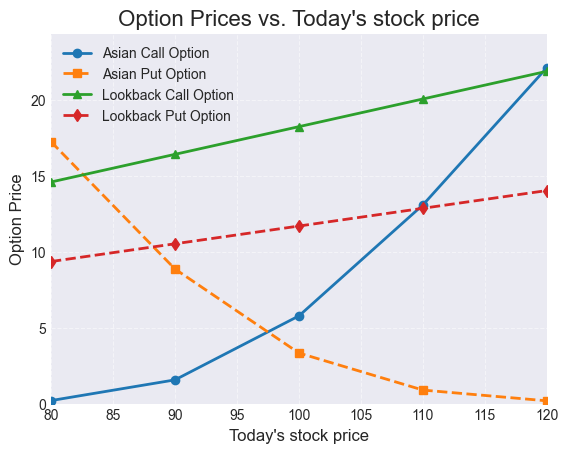

In [155]:
S0_vary = [80, 90, 100, 110, 120]
S_vary = [simulate_path(item, 0.05, 0.2, 1, 252 * 1, 10000) for item in S0_vary]
table_value = []
for i in range(len(S0_vary)):
    table_value.append([S0_vary[i],
                        asian_call_option_price(S_vary[i], E, r, T),
                        asian_put_option_price(S_vary[i], E, r, T),
                        lookback_call_option_price(S_vary[i], r, T),
                        lookback_put_option_price(S_vary[i], r, T)])

print(tabulate(table_value, ['S0_vary', 'asian_call_option_price', 'asian_put_option_price', 'lookback_call_option_price', 'lookback_put_option_price'], tablefmt='grid'))

plot_line_graph(table_value, S0_vary, "Today's stock price")

From the output table above, we can find:
1. For Asian options, given that the strike price, time to expiry, volatility, and risk-free rate are constant, **the higher the initial price, the higher the call option price and the lower the put option price**.
2. For Lookback options, given that the strike price, time to expiry, volatility, and risk-free rate are constant, **the higher the initial price, the higher both the call option price and the put option price**.

Generally, higher initial prices may reflect market participants' expectations of volatility in the price of the underlying asset over time, as well as demand for and risk appetite for options. But for Asian Put Option, 'the higher the initial price, the lower the put option price' can be explained by several factors:
- Average price: the payout of Asian put options depends on the average price over a period of time. When the initial price is high, the average price is relatively high, so that the price of the underlying asset is more likely to be higher than the strike price at expiration of the option, thus reducing the value of the option. Therefore, the higher the initial price, the lower the option price.
- Implied Volatility: The price of Asian options is affected by the volatility of the price of the underlying asset. Implied volatility is the expected volatility in the options market based on the inverse of the option price. When the initial price is high, it usually means that the volatility of the underlying asset is low and therefore the implied volatility is low. Lower implied volatility results in a lower price for the Asian Put Option.
- Risk Neutral Probability: The pricing of Asian Put Option is also affected by the risk neutral probability. The risk-neutral probability is the probability that the price of the underlying asset will reach a specific level under a risk-neutral measure. When the initial price is higher, the risk-neutral probability is lower and therefore the price of the Asian Put Option is correspondingly lower.

## (2) change Strike (E)

+---------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|   Strike_vary |   asian_call_option_price |   asian_put_option_price |   lookback_call_option_price |   lookback_put_option_price |
+===============+===========================+==========================+==============================+=============================+
|            80 |                 21.5326   |                0.0556908 |                      18.2458 |                     11.6962 |
+---------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|            90 |                 12.6387   |                0.67402   |                      18.2458 |                     11.6962 |
+---------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|           100 |                  5.77692  |                3

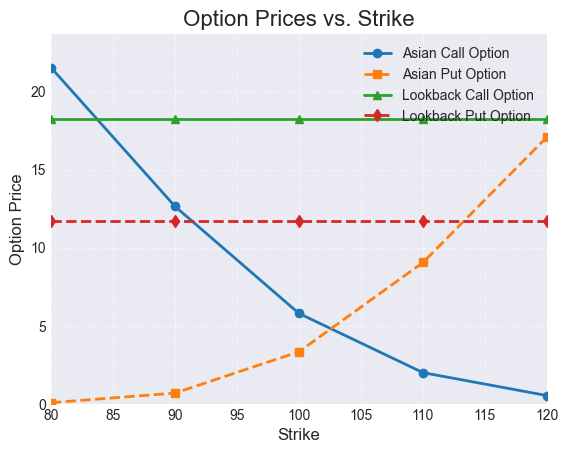

In [156]:
Strike_vary = [80, 90, 100, 110, 120]
S = simulate_path(100, 0.05, 0.2, 1, 252 * 1, 10000)
table_value = []
for i in range(len(Strike_vary)):
    table_value.append([Strike_vary[i],
                        asian_call_option_price(S, Strike_vary[i], r, T),
                        asian_put_option_price(S, Strike_vary[i], r, T),
                        lookback_call_option_price(S, r, T),
                        lookback_put_option_price(S, r, T)])

print(tabulate(table_value, ['Strike_vary', 'asian_call_option_price', 'asian_put_option_price', 'lookback_call_option_price', 'lookback_put_option_price'], tablefmt='grid'))

plot_line_graph(table_value, Strike_vary, "Strike")

From the output table above, we can find:
1. For Asian options, given that the initial price, time to expiry, volatility, and risk-free rate are constant, **the higher the strike price, the lower the call option price and the higher the put option price**. The reason behind this relationship is as follows:
- Asian Call Options: When the strike price is higher, it becomes more difficult for the average price of the underlying asset to exceed the strike price. As a result, the probability of the option being in-the-money decreases, leading to a lower call option price.
- Asian Put Options: Conversely, when the strike price is higher, it becomes more likely for the average price of the underlying asset to fall below the strike price. This increases the probability of the option being in-the-money, leading to a higher put option price.
2. For Lookback options, given that the initial price, time to expiry, volatility, and risk-free rate are constant, **the higher the strike price, both the call and put option price remain unchanged**. Lookback options allow the holder to choose to exercise the option at the most favourable price at the moment of expiry and therefore offer greater flexibility and potential gains.

## (3) change Time to expiry (T)

+---------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|   T_vary/year |   asian_call_option_price |   asian_put_option_price |   lookback_call_option_price |   lookback_put_option_price |
+===============+===========================+==========================+==============================+=============================+
|          0.25 |                   2.61537 |                  1.95019 |                      8.06109 |                     6.3474  |
+---------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|          0.5  |                   3.92324 |                  2.60067 |                     12.2073  |                     8.75476 |
+---------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|          1    |                   5.77692 |                 

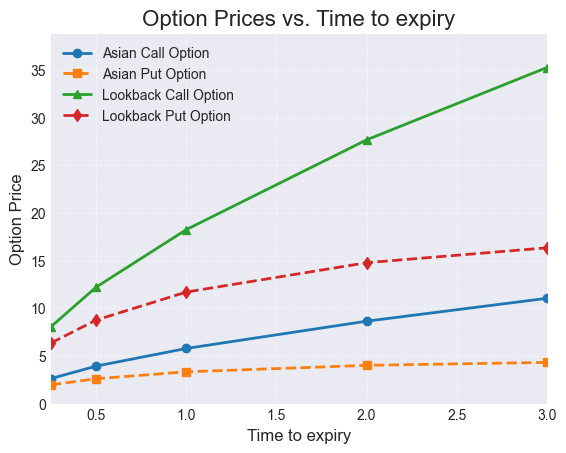

In [157]:
T_vary = [0.25, 0.5, 1, 2, 3]
S_vary = [simulate_path(100, 0.05, 0.2, item, int(252 * item), 10000) for item in T_vary]
table_value = []
for i in range(len(T_vary)):
    table_value.append([T_vary[i],
                        asian_call_option_price(S_vary[i], E, r, T_vary[i]),
                        asian_put_option_price(S_vary[i], E, r, T_vary[i]),
                        lookback_call_option_price(S_vary[i], r, T_vary[i]),
                        lookback_put_option_price(S_vary[i], r, T_vary[i])])

print(tabulate(table_value, ['T_vary/year', 'asian_call_option_price', 'asian_put_option_price', 'lookback_call_option_price', 'lookback_put_option_price'], tablefmt='grid'))

plot_line_graph(table_value, T_vary, "Time to expiry")

From the output table above, we can find:
1. For Asian options, given that the initial price, the strike price, volatility, and risk-free rate are constant, **the longer time to expiry, the higher both the call and put option price**. This is because longer expiry times give option holders more time to make a profit and increase the likelihood that the option will realise a gain at expiry. Therefore, the price of Asian options is positively correlated with the time to expiration.
2. For Lookback options, given that the initial price, the strike price, volatility, and risk-free rate are constant, **the longer time to expiry, the higher both the call and put option price**. This is because a longer expiry time gives the option holder more time to observe the price movement of the underlying asset and choose the most favourable price to exercise the option. As a result, longer expiry times increase the likelihood of realising gains on Lookback options, which in turn increases the price of the option.

## (4) change volatility (sigma)

+-------------------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|   sigma_vary/volatility |   asian_call_option_price |   asian_put_option_price |   lookback_call_option_price |   lookback_put_option_price |
+=========================+===========================+==========================+==============================+=============================+
|                    0.05 |                   2.7193  |                 0.300587 |                      6.78974 |                     1.83374 |
+-------------------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|                    0.1  |                   3.64909 |                 1.21949  |                     10.3503  |                     5.07635 |
+-------------------------+---------------------------+--------------------------+------------------------------+-----------------------

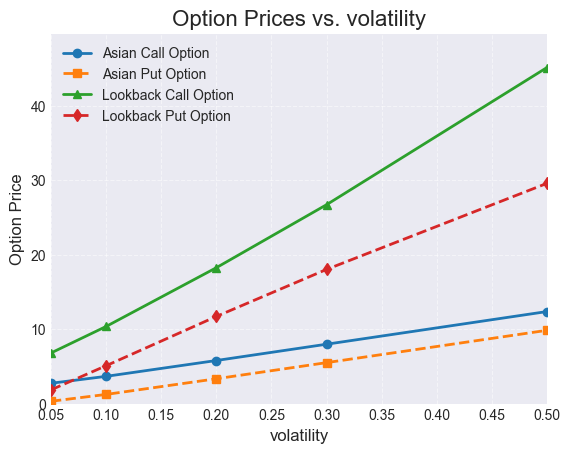

In [158]:
sigma_vary = [0.05, 0.1, 0.2, 0.3, 0.5]
S_vary = [simulate_path(100, 0.05, item, 1, 252 * 1, 10000) for item in sigma_vary]
table_value = []
for i in range(len(sigma_vary)):
    table_value.append([sigma_vary[i],
                        asian_call_option_price(S_vary[i], E, r, T),
                        asian_put_option_price(S_vary[i], E, r, T),
                        lookback_call_option_price(S_vary[i], r, T),
                        lookback_put_option_price(S_vary[i], r, T)])

print(tabulate(table_value, ['sigma_vary/volatility', 'asian_call_option_price', 'asian_put_option_price', 'lookback_call_option_price', 'lookback_put_option_price'],
               tablefmt='grid'))

plot_line_graph(table_value, sigma_vary, "volatility")

From the output table above, we can find:
1. For Asian options, given that the initial price, the strike price, time to expiry, and risk-free rate are constant, **the higher the volatility, the higher both the call and put option price**.
2. For Lookback options, given that the initial price, the strike price, time to expiry, and risk-free rate are constant, **the higher the volatility, the higher both the call and put option price**.

Volatility is a measure of the degree of fluctuation in the price of the underlying asset. When volatility increases, the range of possibilities for the price of the underlying asset also increases, thereby increasing the chances that the option holder will receive a favourable price movement. High volatility increases the risk of the option and the option holder has a greater chance of profiting from the price movement. To compensate for this risk, the market will demand a higher option price.

## (5) change constant risk-free interest rate (r)

+-------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|   rate_vary |   asian_call_option_price |   asian_put_option_price |   lookback_call_option_price |   lookback_put_option_price |
+=============+===========================+==========================+==============================+=============================+
|        0.05 |                   4.84101 |                  4.30067 |                      16.4937 |                    13.7549  |
+-------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|        0.1  |                   5.06671 |                  4.03867 |                      16.9197 |                    13.2131  |
+-------------+---------------------------+--------------------------+------------------------------+-----------------------------+
|        0.2  |                   5.77692 |                  3.32457 |      

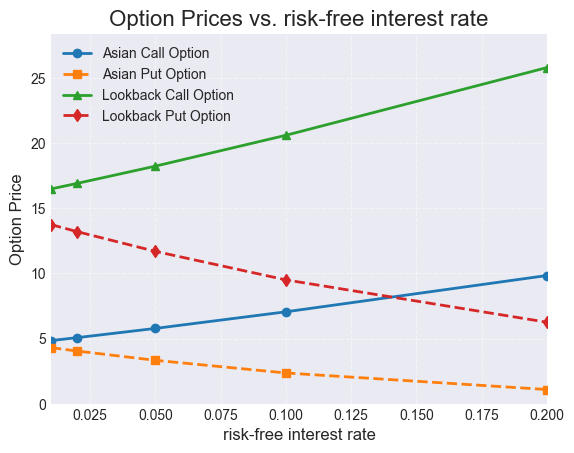

In [159]:
rate_vary = [0.01, 0.02, 0.05, 0.1, 0.2]
S_vary = [simulate_path(100, item, 0.2, 1, 252 * 1, 10000) for item in rate_vary]
table_value = []
for i in range(len(rate_vary)):
    table_value.append([sigma_vary[i],
                        asian_call_option_price(S_vary[i], E, rate_vary[i], T),
                        asian_put_option_price(S_vary[i], E, rate_vary[i], T),
                        lookback_call_option_price(S_vary[i], rate_vary[i], T),
                        lookback_put_option_price(S_vary[i], rate_vary[i], T)])

print(tabulate(table_value, ['rate_vary', 'asian_call_option_price', 'asian_put_option_price', 'lookback_call_option_price', 'lookback_put_option_price'], tablefmt='grid'))

plot_line_graph(table_value, rate_vary, "risk-free interest rate")

From the output table above, we can find:
1. For Asian options, given that the initial price, the strike price, time to expiry, and the volatility are constant, **the higher the risk-free rate, the higher the call option price and the lower the put option price**.
2. For Lookback options, given that the initial price, the strike price, time to expiry, and the volatility are constant, **the higher the risk-free rate, the higher the call option price and the lower the put option price**.

This is because a higher risk-free rate increases the discounted value of the profit that the option holder will receive at maturity, thus increasing the price of the call option. Conversely, a higher risk-free rate reduces the discounted value of the put option and therefore reduces the price of the put option.

# References
1. Sauer, Timothy. "Computational solution of stochastic differential equations." Wiley Interdisciplinary Reviews: Computational Statistics 5.5 (2013): 362-371.
2. https://en.wikipedia.org/wiki/Asian_option
3. https://en.wikipedia.org/wiki/Lookback_option
4. https://en.wikipedia.org/wiki/Call_option
5. https://en.wikipedia.org/wiki/Put_option
4. https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method